In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#read in data created in QGIS
ETHdf = pd.read_csv('/Users/hadenhenke/Library/CloudStorage/OneDrive-TheUniversityofManchester/Dissertation/Data/CombinedData/Ethiopia/EthiopiaCombinedData.csv')
BRAdf = pd.read_csv('/Users/hadenhenke/Library/CloudStorage/OneDrive-TheUniversityofManchester/Dissertation/Data/CombinedData/Brazil/BrazilCombinedData.csv')

In [3]:
#drop non-numeric columns
ETHnumerical_data = ETHdf.drop(["shapeName", "shapeID", "shapeGroup"], axis=1)
#drop non-numeric columns
BRAnumerical_data = BRAdf.drop(["shapeName", "shapeID", "shapeGroup"], axis=1)

In [4]:
# Assuming 'Population' column exists, normalize infrastructure counts
infrastructure_columns = ['Comms', 'Edu', 'Gov', 'Green', 'Health', 'Rail', 'Road', 'Safety', 'Traffic', 'Transport', 'Utility']

# Normalize by population and replace original columns
for col in infrastructure_columns:
    ETHnumerical_data[col + '_per_capita'] = ETHnumerical_data[col] / ETHnumerical_data['Population']
    
for col in infrastructure_columns:
    BRAnumerical_data[col + '_per_capita'] = BRAnumerical_data[col] / BRAnumerical_data['Population']
    


In [5]:

# And you want to extract the columns listed
columns_to_extract = ['Comms_per_capita', 'Edu_per_capita', 'Gov_per_capita',
                      'Green_per_capita', 'Health_per_capita', 'Rail_per_capita',
                      'Road_per_capita', 'Safety_per_capita', 'Traffic_per_capita',
                      'Transport_per_capita', 'Utility_per_capita']

# Create a new DataFrame with only the selected columns
ETH_normalizedCounts = ETHnumerical_data[columns_to_extract].copy()
BRA_normalizedCounts = BRAnumerical_data[columns_to_extract].copy()
# 'new_df' now contains only the selected columns


In [8]:
df = ETHnumerical_data.copy()

# extract the normalized infrastructure columns
infrastructure_columns = ['Comms_per_capita', 'Edu_per_capita', 'Gov_per_capita', 'Green_per_capita', 'Health_per_capita', 'Rail_per_capita', 'Road_per_capita', 'Safety_per_capita', 'Traffic_per_capita', 'Transport_per_capita', 'Utility_per_capita']

# Standardize the data
scaler = StandardScaler()
scaled_data_df = pd.DataFrame(scaler.fit_transform(df[infrastructure_columns]), columns=infrastructure_columns)

# Perform PCA
pca = PCA()
pca_data_df = pd.DataFrame(pca.fit_transform(scaled_data_df), columns=[f'PC{i+1}' for i in range(len(infrastructure_columns))])

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Create DataFrames for EVR and CVR
evr_df = pd.DataFrame({'Principal Component': range(1, len(explained_var_ratio) + 1),
                       'Explained Variance Ratio': explained_var_ratio,
                       'Eigenvalues:': eigenvalues,
                       'Cumulative Explained Variance': cumulative_var_ratio})

loadings = pca.components_.T

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=scaled_data_df.columns)
loadings_df.to_csv('/Users/hadenhenke/Downloads/ETHloadings.csv')

# Output the EVR and CVR as tables
print("Explained Variance Ratio and Cumulative Explained Variance:")
evr_df.to_csv('/Users/hadenhenke/Downloads/ETHtemptable.csv')
evr_df_ETH = evr_df.copy()

# Print the PCA DataFrame
pca_data_ETH = pca_data_df.copy()
pca_data_ETH

Explained Variance Ratio and Cumulative Explained Variance:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,2.103041,-1.578538,-0.388179,-1.411783,0.607453,0.071444,-0.128252,1.457653,0.082631,0.706861,0.562546
1,1.628834,-0.645308,-0.334263,-0.756717,0.829684,-0.244208,-0.697891,0.085320,0.423662,0.528243,-0.045748
2,2.788044,-0.439416,-0.242922,-0.991940,0.213091,0.048890,0.243027,1.567766,-1.069136,0.198958,-0.952001
3,0.410986,-0.343914,-0.054831,-0.808285,-0.159379,-0.140584,-0.288155,0.473847,0.177042,-0.028315,-0.006668
4,1.763930,-1.284457,-0.533283,1.240713,0.967752,-1.844733,-0.600062,1.224199,0.786111,-0.959962,0.290091
...,...,...,...,...,...,...,...,...,...,...,...
81,-1.189648,-0.142305,-0.366427,0.300243,-0.095016,0.222250,-0.021194,-0.111181,-0.205600,0.146783,0.010511
82,12.407388,-3.965460,0.032615,-2.650516,0.351109,-0.088603,-2.126871,-1.186762,-0.418945,-0.060931,-0.164420
83,12.312711,5.430542,-0.446538,0.645472,-0.285117,1.275132,1.092265,0.522019,0.191466,-0.027777,-0.122814
84,7.912447,2.591715,0.905407,1.276812,-1.115734,-2.421395,0.810179,-0.832218,-0.355922,-0.254559,0.623968


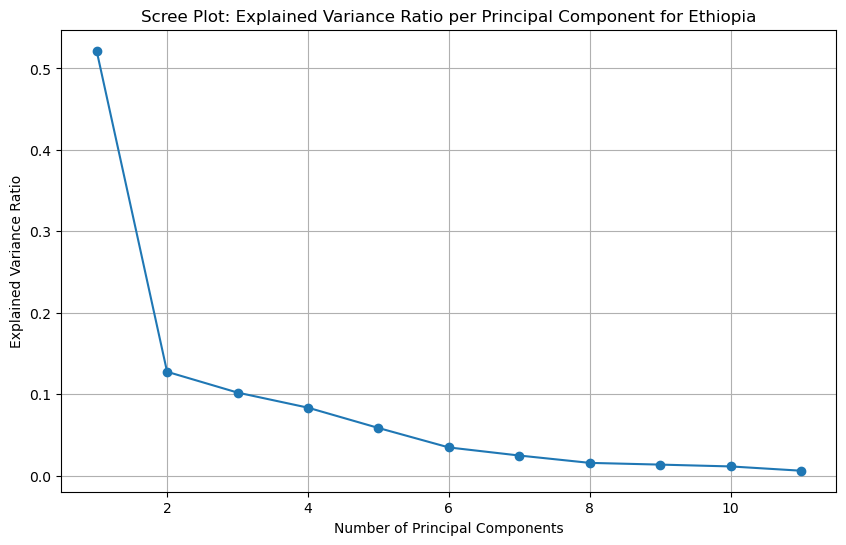

In [9]:
# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance Ratio per Principal Component for Ethiopia')
plt.grid(True)
plt.show()

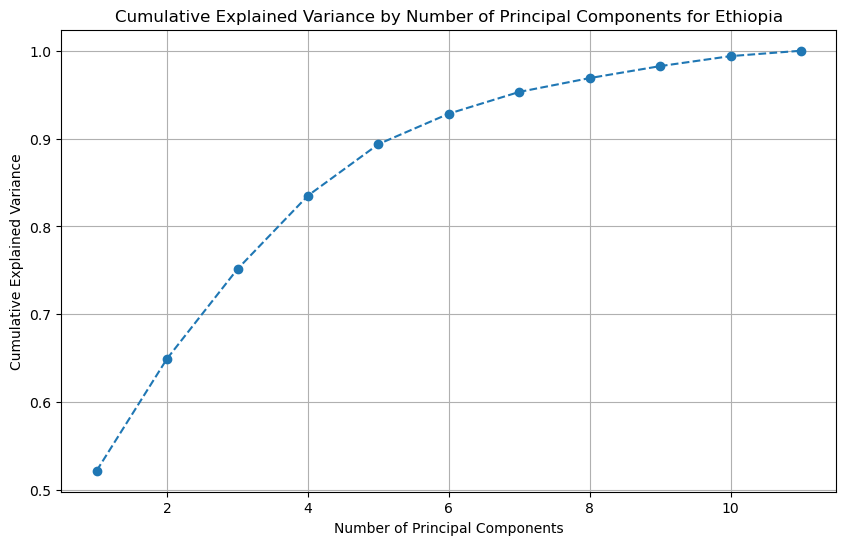

In [10]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components for Ethiopia')
plt.grid(True)
plt.show()

In [11]:
df = BRAnumerical_data.copy()

# Assuming 'Population' column exists, extract the normalized infrastructure columns
infrastructure_columns = ['Comms_per_capita', 'Edu_per_capita', 'Gov_per_capita', 'Green_per_capita', 'Health_per_capita', 'Rail_per_capita', 'Road_per_capita', 'Safety_per_capita', 'Traffic_per_capita', 'Transport_per_capita', 'Utility_per_capita']

# Standardize the data
scaler = StandardScaler()
scaled_data_df = pd.DataFrame(scaler.fit_transform(df[infrastructure_columns]), columns=infrastructure_columns)

# Perform PCA
pca = PCA()
pca_data_df = pd.DataFrame(pca.fit_transform(scaled_data_df), columns=[f'PC{i+1}' for i in range(len(infrastructure_columns))])

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Create DataFrames for EVR and CVR
evr_df = pd.DataFrame({'Principal Component': range(1, len(explained_var_ratio) + 1),
                       'Explained Variance Ratio': explained_var_ratio,
                       'Eigenvalues:': eigenvalues,
                       'Cumulative Explained Variance': cumulative_var_ratio})

loadings = pca.components_.T

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=scaled_data_df.columns)
loadings_df.to_csv('/Users/hadenhenke/Downloads/BRAloadings.csv')

# Output the EVR and CVR as tables
print("Explained Variance Ratio and Cumulative Explained Variance:")
evr_df.to_csv('/Users/hadenhenke/Downloads/BRAtemptable.csv')
evr_df_BRA = evr_df.copy()

# Print the PCA DataFrame
pca_data_BRA = pca_data_df.copy()
pca_data_BRA

Explained Variance Ratio and Cumulative Explained Variance:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.666194,0.647984,0.177187,1.462289,1.097553,-2.286851,-1.386239,-0.729259,0.283936,0.292725,-0.646735
1,0.803044,-0.021136,0.076133,0.652080,-0.519534,-0.541903,-1.018638,-0.516590,-0.492788,0.635821,-0.728235
2,1.375809,0.160787,-0.299169,0.761502,1.034160,-0.462298,0.250653,-1.346851,-0.449656,-0.600795,0.424933
3,0.589766,-0.053529,-0.118801,0.256255,-0.116208,0.218989,-0.326441,-1.320255,-0.416462,0.634211,-1.875272
4,3.126449,0.055542,-0.541367,0.785562,0.876902,0.188770,0.869337,-3.021373,-0.687136,0.826420,-2.139504
...,...,...,...,...,...,...,...,...,...,...,...
5565,-0.763480,-0.194278,-0.070993,0.012101,-0.050724,0.101725,0.044975,-0.075528,-0.166560,-0.327034,0.367110
5566,-0.925415,-0.173105,-0.021641,0.051215,-0.102990,0.216981,0.105631,0.207394,0.046414,0.017696,0.085983
5567,0.291018,-0.279757,0.725872,0.684707,-0.375466,-0.797833,-0.775183,0.674676,-0.779064,-0.374030,0.284704
5568,0.682272,0.264165,0.249816,0.850336,0.317467,-1.061072,-1.043815,-0.500109,0.222700,-0.115214,0.081595


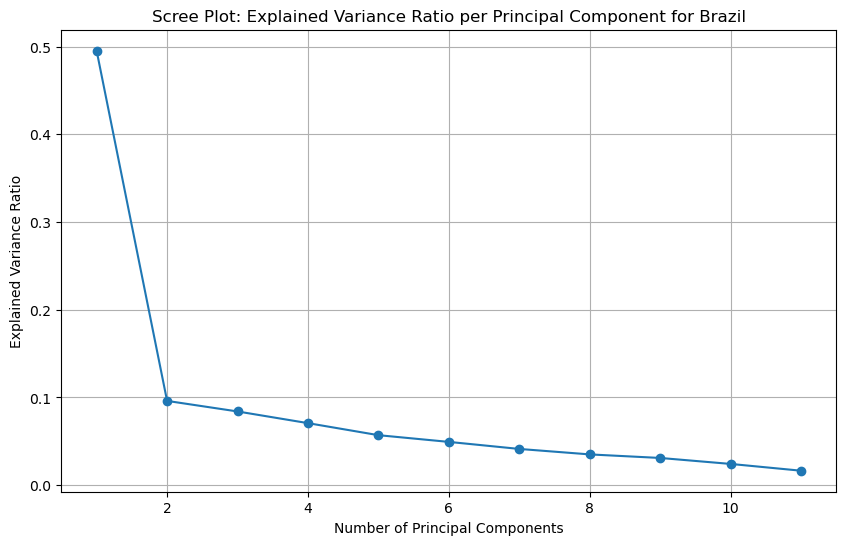

In [12]:
# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance Ratio per Principal Component for Brazil')
plt.grid(True)
plt.show()

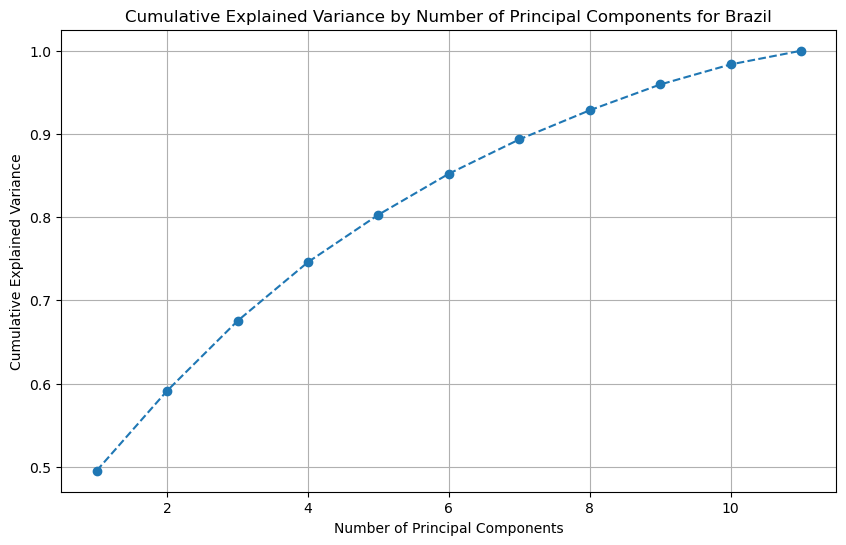

In [13]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components for Brazil')
plt.grid(True)
plt.show()

In [16]:
# Assuming your dataframe is named 'df'
SelectedPCsETH = pca_data_ETH[['PC1', 'PC2', 'PC3']].copy()
SelectedPCsBRA = pca_data_BRA[['PC1', 'PC2', 'PC3']].copy()


In [20]:
TotalVarianceETH = evr_df_ETH.loc[2, "Cumulative Explained Variance"] * 100
TotalVarianceBRA = evr_df_BRA.loc[2, "Cumulative Explained Variance"] * 100

In [21]:
TotalVarianceETH

75.15059849823812

In [22]:
TotalVarianceBRA

67.53288654808765

In [23]:
SelectedPCsETH['IAI'] = (evr_df_ETH['Explained Variance Ratio'].iloc[0] / TotalVarianceETH) * SelectedPCsETH['PC1'] + \
                            (evr_df_ETH['Explained Variance Ratio'].iloc[1] / TotalVarianceETH) * SelectedPCsETH['PC2'] + \
                            (evr_df_ETH['Explained Variance Ratio'].iloc[2] / TotalVarianceETH) * SelectedPCsETH['PC3']


In [24]:
SelectedPCsETH.to_csv('/Users/hadenhenke/Downloads/ETHIndex.csv')

In [25]:
evr_df_BRA['Explained Variance Ratio'] = evr_df_BRA['Explained Variance Ratio'] * 100

In [26]:
SelectedPCsBRA['IAI'] = (evr_df_BRA['Explained Variance Ratio'].iloc[0] / TotalVarianceBRA) * SelectedPCsBRA['PC1'] + \
                            (evr_df_BRA['Explained Variance Ratio'].iloc[1] / TotalVarianceBRA) * SelectedPCsBRA['PC2'] + \
                            (evr_df_BRA['Explained Variance Ratio'].iloc[2] / TotalVarianceBRA) * SelectedPCsBRA['PC3']


In [27]:
SelectedPCsBRA.to_csv('/Users/hadenhenke/Downloads/BRAIndex.csv')

In [28]:
ETHdf

,shapeName,shapeID,shapeGroup,Population,RWI_median,Comms,Edu,Gov,Green,Health,Rail,Road,Safety,Traffic,Transport,Utility
0,North Western,89294058B73532009095191,ETH,930424,-0.4190,0,164,29,42,16,0.00000,1.848806e+06,2,136,14,3
1,Central,89294058B37888721814814,ETH,1568039,-0.3520,3,126,18,76,18,0.00000,2.311100e+06,5,215,24,5
2,Eastern,89294058B82677783999374,ETH,985270,-0.3850,0,119,44,40,54,0.00000,1.694822e+06,3,112,18,5
3,Southern,89294058B63215421406174,ETH,1252120,-0.4025,1,91,13,25,14,0.00000,1.141720e+06,2,52,14,5
4,Western,89294058B84100195660631,ETH,468242,-0.4300,0,31,5,5,2,0.00000,1.580163e+06,2,78,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Guji,89294058B24872767896853,ETH,1987050,-0.4850,0,3,4,8,4,0.00000,5.194349e+06,0,24,3,0
82,Mekelle,89294058B62302190324952,ETH,436910,-0.3560,4,131,54,85,30,0.00000,1.808056e+06,3,173,28,17
83,Addis Ababa,89294058B47397371079898,ETH,3773999,-0.2335,65,509,1056,312,474,190800.36440,9.768182e+06,74,653,179,26
84,Dire Dawa,89294058B29362629675398,ETH,285000,-0.3400,2,9,57,14,16,15354.71753,6.844475e+05,5,37,14,6


In [29]:
min_iai = SelectedPCsETH['IAI'].min()
max_iai = SelectedPCsETH['IAI'].max()
# Compute the Standardized Index (SIAI) using Min-Max normalization
SelectedPCsETH['SIAI'] = ((SelectedPCsETH['IAI'] - min_iai) / (max_iai - min_iai)) * 100
SelectedPCsETH.to_csv('/Users/hadenhenke/Downloads/ETHIndex.csv')

In [30]:
min_iai = SelectedPCsBRA['IAI'].min()
max_iai = SelectedPCsBRA['IAI'].max()
# Compute the Standardized Index (SIAI) using Min-Max normalization
SelectedPCsBRA['SIAI'] = ((SelectedPCsBRA['IAI'] - min_iai) / (max_iai - min_iai)) * 100
SelectedPCsBRA.to_csv('/Users/hadenhenke/Downloads/BRAIndex.csv')

In [31]:
SelectedPCsETH

,PC1,PC2,PC3,IAI,SIAI
0,2.103041,-1.578538,-0.388179,0.011395,20.802416
1,1.628834,-0.645308,-0.334263,0.009760,19.237089
2,2.788044,-0.439416,-0.242922,0.018283,27.397511
3,0.410986,-0.343914,-0.054831,0.002195,11.993769
4,1.763930,-1.284457,-0.533283,0.009343,18.837296
...,...,...,...,...,...
81,-1.189648,-0.142305,-0.366427,-0.009000,1.274678
82,12.407388,-3.965460,0.032615,0.079464,85.976305
83,12.312711,5.430542,-0.446538,0.094111,100.000000
84,7.912447,2.591715,0.905407,0.060572,67.888040


In [32]:
ETH_Results = pd.concat([ETHdf, SelectedPCsETH], axis=1)
ETH_Results2 = ETH_Results[['shapeName', 'Population', 'RWI_median', 'SIAI']]
ETH_Results2.to_csv('/Users/hadenhenke/Downloads/ETHIndexJoined.csv')

In [33]:
BRA_Results = pd.concat([BRAdf, SelectedPCsBRA], axis=1)
BRA_Results2 = BRA_Results[['shapeName', 'Population', 'RWI_median', 'SIAI']]
BRA_Results2.to_csv('/Users/hadenhenke/Downloads/BRAIndexJoined.csv')

In [36]:
BRA_Results2.describe()

,Population,RWI_median,SIAI
count,5.570000e+03,5569.000000,5570.000000
mean,3.856647e+04,-0.129499,1.171195
std,2.242624e+05,0.353178,2.165772
min,7.710000e+02,-0.817000,0.000000
25%,5.396250e+03,-0.394000,0.503256
50%,1.167700e+04,-0.214000,0.799466
75%,2.568125e+04,0.062000,1.299391
max,1.239637e+07,1.359000,100.000000


In [37]:
ETH_Results2.describe()

,Population,RWI_median,SIAI
count,8.600000e+01,86.000000,86.000000
mean,1.196317e+06,-0.382076,9.891820
std,1.102062e+06,0.126948,16.198078
min,5.402200e+04,-0.735000,0.000000
25%,3.108778e+05,-0.430750,2.078233
50%,7.999835e+05,-0.352000,4.706099
75%,1.907401e+06,-0.306500,11.858785
max,3.987457e+06,-0.096000,100.000000


In [133]:
ethDF = ETH_Results2.copy()
braDF = BRA_Results2.copy()
ethDF.rename(columns={'RWI_median': 'RWI'}, inplace=True)
braDF.rename(columns={'RWI_median': 'RWI'}, inplace=True)

## Looking at the relationship between SIAI and RWI

In [134]:
import numpy as np

# Ensure all values of SIAI are positive
if ethDF['SIAI'].min() <= 0:
    ethDF['SIAI'] += abs(ethDF['SIAI'].min()) + 0.1

if braDF['SIAI'].min() <= 0:
    braDF['SIAI'] += abs(braDF['SIAI'].min()) + 0.1

# Log-transform the SIAI column
ethDF['log_SIAI'] = np.log(ethDF['SIAI'])
braDF['log_SIAI'] = np.log(braDF['SIAI'])


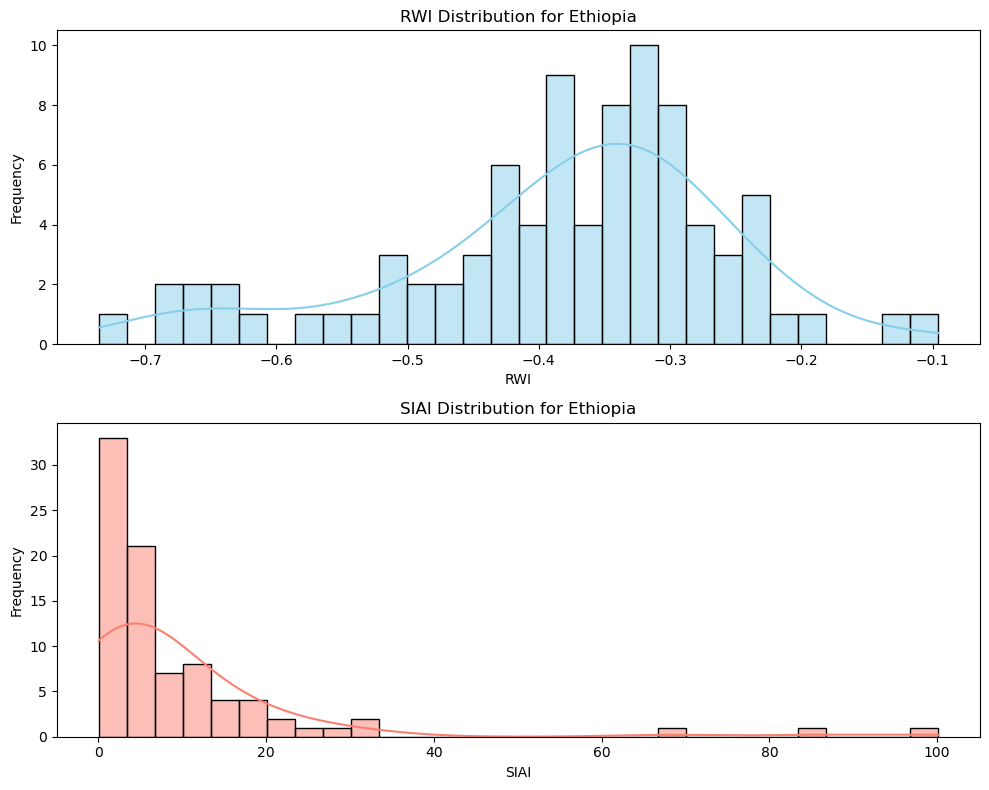

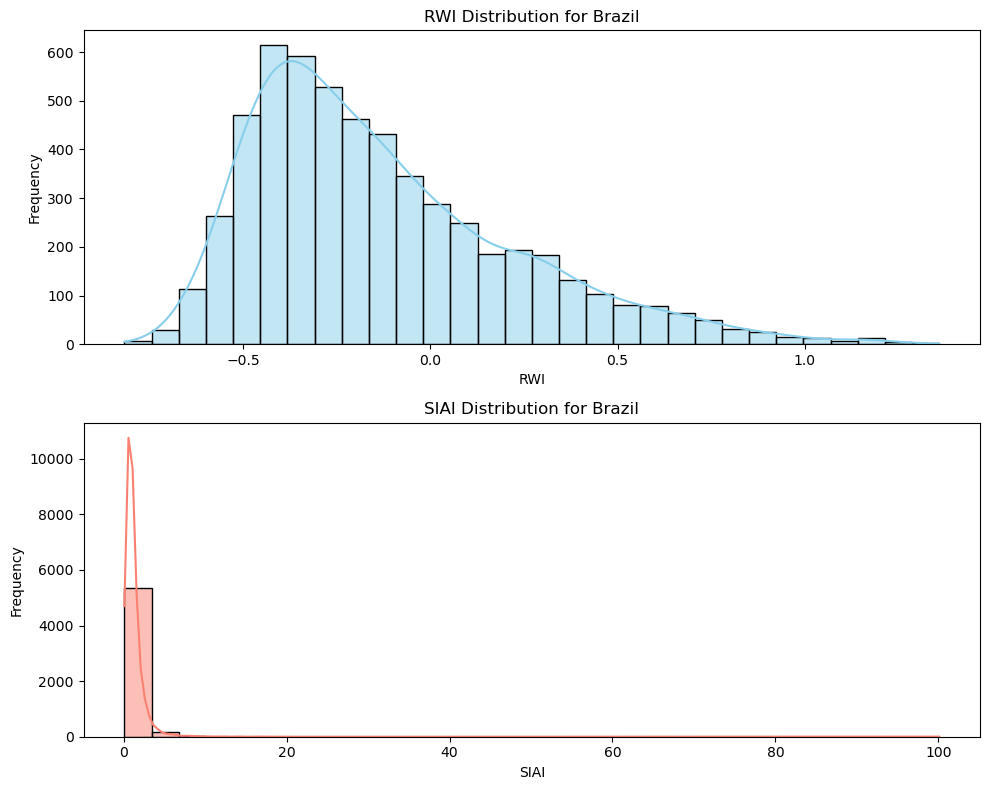

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms(df, country_name):
    # Set up the figure and axes
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    
    # Plot histogram for RWI
    sns.histplot(df['RWI'], kde=True, ax=ax[0], color='skyblue', bins=30)
    ax[0].set_title(f'RWI Distribution for {country_name}')
    ax[0].set_xlabel('RWI')
    ax[0].set_ylabel('Frequency')
    
    # Plot histogram for SIAI
    sns.histplot(df['SIAI'], kde=True, ax=ax[1], color='salmon', bins=30)
    ax[1].set_title(f'SIAI Distribution for {country_name}')
    ax[1].set_xlabel('SIAI')
    ax[1].set_ylabel('Frequency')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Assuming df_ethiopia and df_brazil are your dataframes
# Plot histograms for Ethiopia
plot_histograms(ethDF, 'Ethiopia')

# Plot histograms for Brazil
plot_histograms(braDF, 'Brazil')


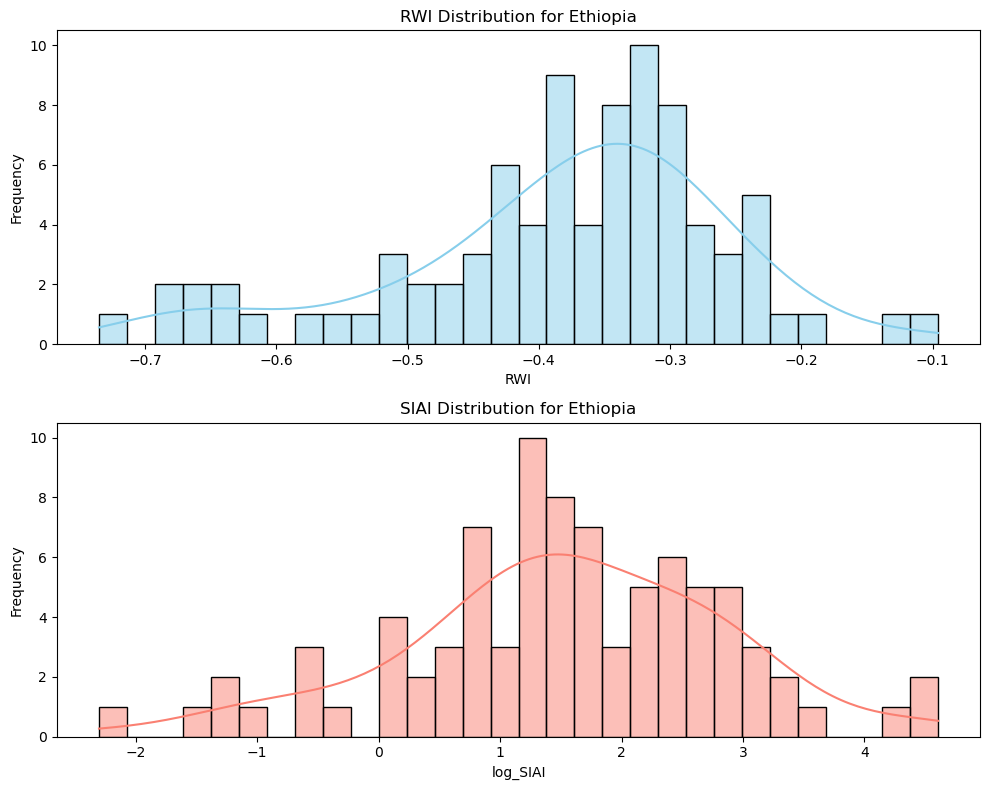

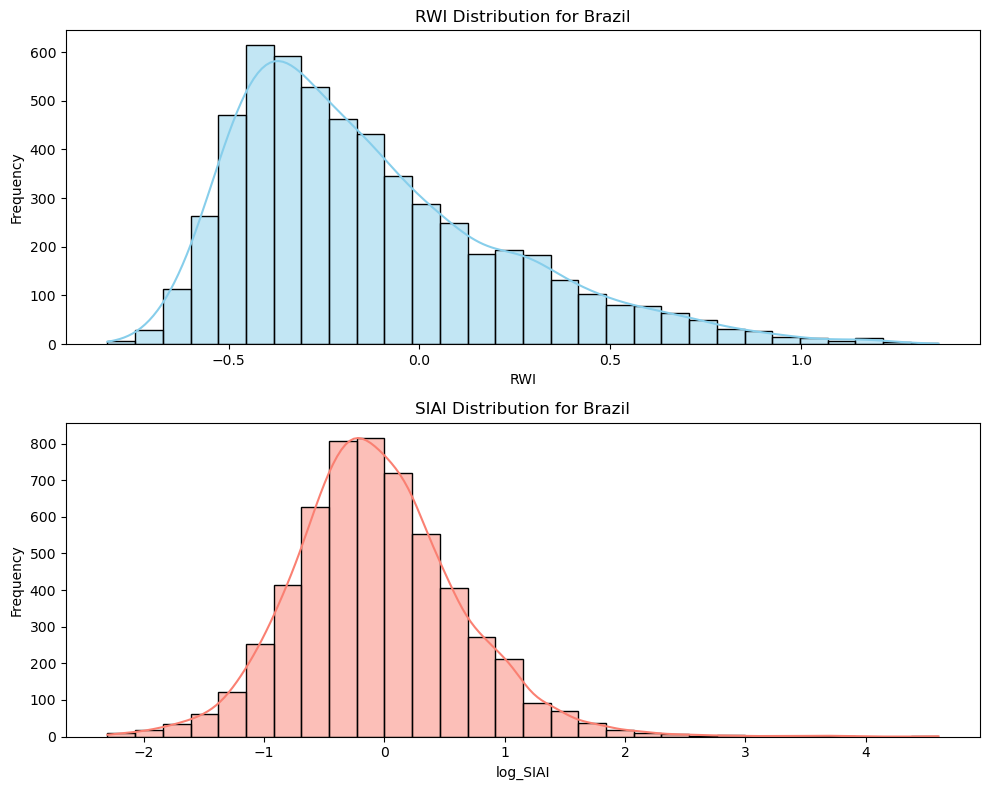

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms(df, country_name):
    # Set up the figure and axes
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    
    # Plot histogram for RWI
    sns.histplot(df['RWI'], kde=True, ax=ax[0], color='skyblue', bins=30)
    ax[0].set_title(f'RWI Distribution for {country_name}')
    ax[0].set_xlabel('RWI')
    ax[0].set_ylabel('Frequency')
    
    # Plot histogram for SIAI
    sns.histplot(df['log_SIAI'], kde=True, ax=ax[1], color='salmon', bins=30)
    ax[1].set_title(f'SIAI Distribution for {country_name}')
    ax[1].set_xlabel('log_SIAI')
    ax[1].set_ylabel('Frequency')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Assuming df_ethiopia and df_brazil are your dataframes
# Plot histograms for Ethiopia
plot_histograms(ethDF, 'Ethiopia')

# Plot histograms for Brazil
plot_histograms(braDF, 'Brazil')


In [137]:
import pandas as pd

# Descriptive statistics
temp = ethDF[['RWI', 'SIAI']].describe()
temp.to_csv('/Users/hadenhenke/Downloads/ETH_Describe.csv')
temp = braDF[['RWI', 'SIAI']].describe()
temp.to_csv('/Users/hadenhenke/Downloads/BRA_Describe.csv')

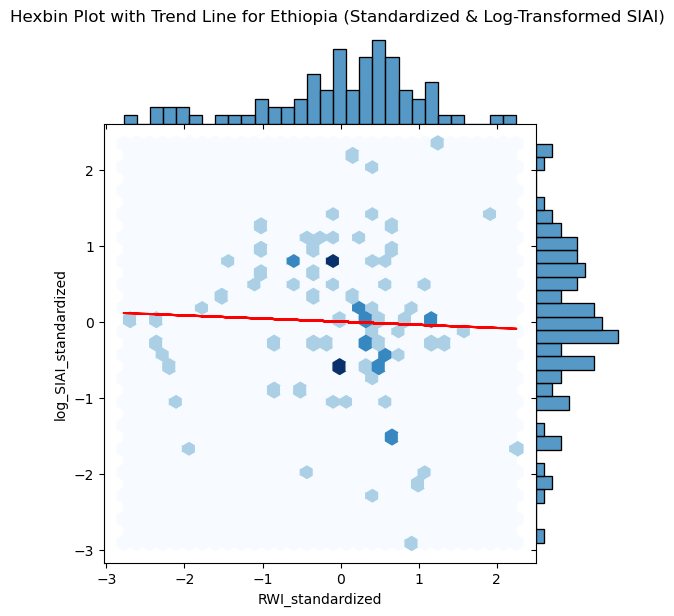

/var/folders/tq/kv5trzlx78l1xxhlbqxcphdm0000gn/T/ipykernel_71355/1179406118.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RWI_standardized'] = (df['RWI'] - df['RWI'].mean()) / df['RWI'].std()
/var/folders/tq/kv5trzlx78l1xxhlbqxcphdm0000gn/T/ipykernel_71355/1179406118.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_SIAI_standardized'] = (df['log_SIAI'] - df['log_SIAI'].mean()) / df['log_SIAI'].std()


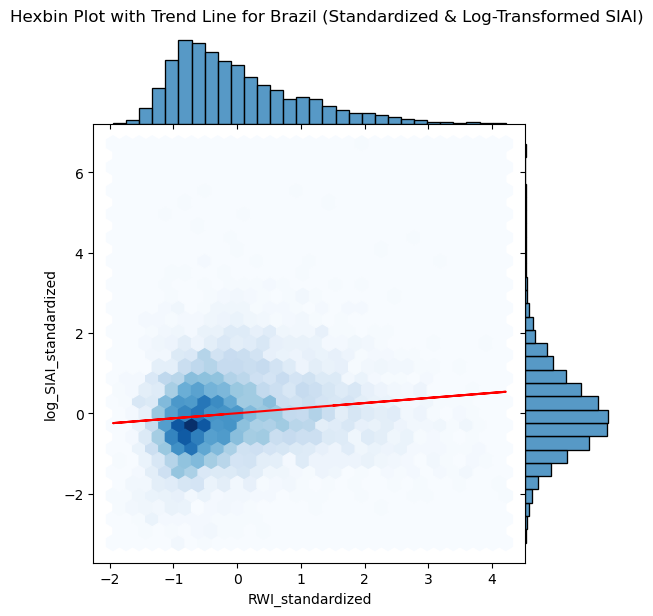

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_hexbin_with_trendline(df, country_name):
    # Ensure there are no missing, infinite, or NaN values
    df = df.dropna()
    
    # Standardize the data
    df['RWI_standardized'] = (df['RWI'] - df['RWI'].mean()) / df['RWI'].std()
    df['log_SIAI_standardized'] = (df['log_SIAI'] - df['log_SIAI'].mean()) / df['log_SIAI'].std()
    
    # Create hex bin plot
    g = sns.JointGrid(x='RWI_standardized', y='log_SIAI_standardized', data=df, space=0)
    g = g.plot_joint(plt.hexbin, cmap="Blues", gridsize=30)
    
    # Fit a linear regression line
    try:
        m, b = np.polyfit(df['RWI_standardized'], df['log_SIAI_standardized'], 1)
        g.ax_joint.plot(df['RWI_standardized'], m*df['RWI_standardized'] + b, color='red')
    except np.linalg.LinAlgError:
        print(f"Couldn't fit a linear regression for {country_name} due to numerical issues.")
    
    # Add marginal histograms
    g = g.plot_marginals(sns.histplot, kde=False, bins=30)
    
    # Set title and labels
    plt.suptitle(f'Hexbin Plot with Trend Line for {country_name} (Standardized & Log-Transformed SIAI)', y=1.02)
    plt.show()

# Assuming df_ethiopia and df_brazil are your dataframes
# Plot for Ethiopia
plot_hexbin_with_trendline(ethDF, 'Ethiopia')

# Plot for Brazil
plot_hexbin_with_trendline(braDF, 'Brazil')


In [143]:
# Assuming you've already imported pandas and your dataframe is named 'df'
correlation = ethDF['RWI'].corr(ethDF['log_SIAI'])
print(f'Correlation between RWI and SIAI: {correlation:.2f}')


Correlation between RWI and SIAI: -0.04


In [144]:
correlation = braDF['RWI'].corr(braDF['log_SIAI'])
print(f'Correlation between RWI and SIAI: {correlation:.2f}')

Correlation between RWI and SIAI: 0.13


In [145]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

def run_regression(df):
    # Handle missing or infinite values
    df_cleaned = df.dropna().replace([np.inf, -np.inf], np.nan).dropna()
    
    X = sm.add_constant(df_cleaned['RWI'])
    y = df_cleaned['log_SIAI']
    model = sm.OLS(y, X).fit()
    return model

# Run regression for both datasets
model_ethiopia = run_regression(ethDF)
model_brazil = run_regression(braDF)

# Extract key statistics and compile into a dataframe
results = {
    'Dataset': ['Ethiopia', 'Brazil'],
    'Intercept': [model_ethiopia.params['const'], model_brazil.params['const']],
    'RWI Coefficient': [model_ethiopia.params['RWI'], model_brazil.params['RWI']],
    'R-squared': [model_ethiopia.rsquared, model_brazil.rsquared],
    'Intercept p-value': [model_ethiopia.pvalues['const'], model_brazil.pvalues['const']],
    'RWI p-value': [model_ethiopia.pvalues['RWI'], model_brazil.pvalues['RWI']]
}

results_df = pd.DataFrame(results)

results_df


,Dataset,Intercept,RWI Coefficient,R-squared,Intercept p-value,RWI p-value
0,Ethiopia,1.360897,-0.426597,0.001692,0.003641,7.068656e-01
1,Brazil,-0.029008,0.249574,0.016047,0.003249,2.321648e-21


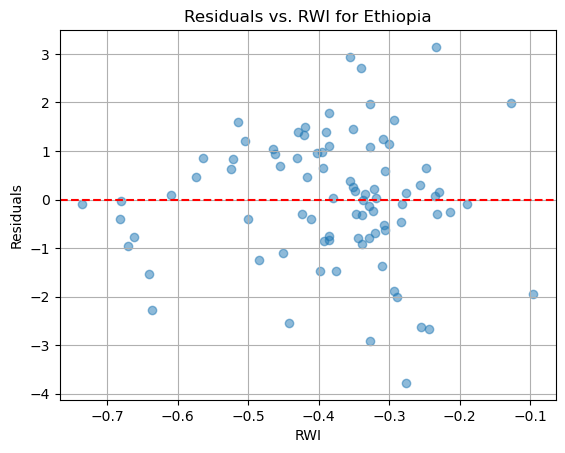

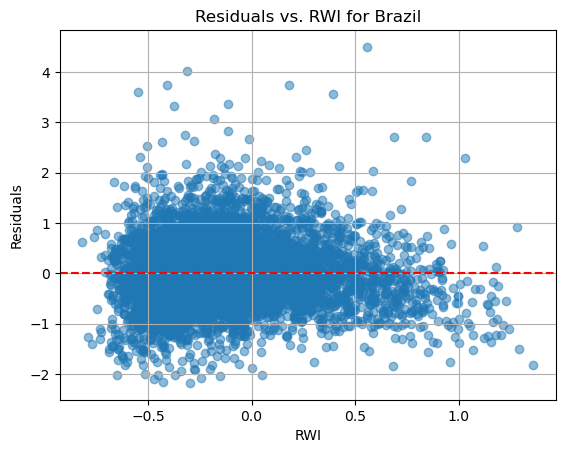

In [146]:
import matplotlib.pyplot as plt

def plot_residuals(model, df, country):
    # Use the cleaned dataset for plotting
    df_cleaned = df.dropna().replace([np.inf, -np.inf], np.nan).dropna()
    
    residuals = model.resid
    plt.scatter(df_cleaned['RWI'], residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs. RWI for {country}')
    plt.xlabel('RWI')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

# Plot residuals for both datasets
plot_residuals(model_ethiopia, ethDF, 'Ethiopia')
plot_residuals(model_brazil, braDF, 'Brazil')
